In [1]:
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip intel-image-classification.zip > /dev/null

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 97% 337M/346M [00:04<00:00, 56.0MB/s]
100% 346M/346M [00:05<00:00, 72.2MB/s]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
img_height,img_width=224,224
batch_size=32
data_dir = "./seg_train/seg_train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.


In [4]:
val_dir = "./seg_test/seg_test"
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3000 files belonging to 6 classes.


In [5]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


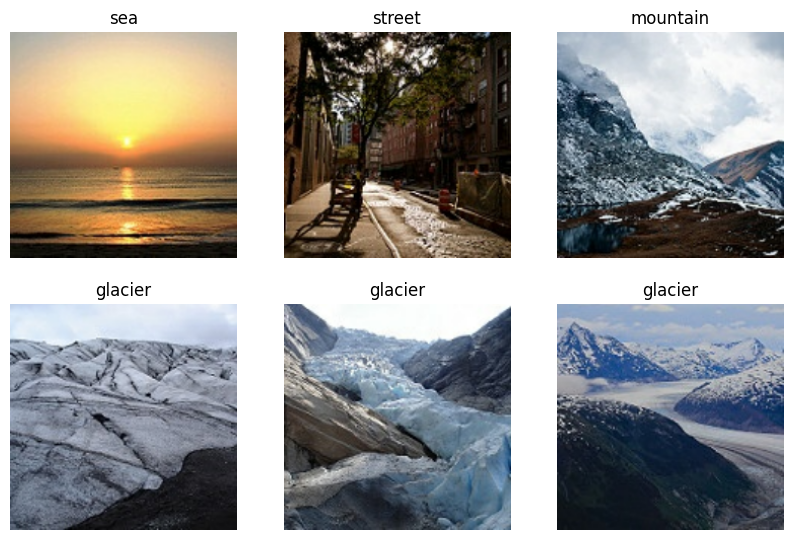

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
from tensorflow.keras.layers import Lambda
resnet_model = Sequential()
resnet_model.add(Lambda(lambda x: x, input_shape=(224, 224, 3)))
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(6, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,639,878 (93.99 MB)

 Trainable params: 1,052,166 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 68s 123ms/step - accuracy: 0.8588 - loss: 0.4222 - val_accuracy: 0.9010 - val_loss: 0.2755
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 69s 107ms/step - accuracy: 0.9212 - loss: 0.2119 - val_accuracy: 0.9113 - val_loss: 0.2533
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 82s 107ms/step - accuracy: 0.9415 - loss: 0.1671 - val_accuracy: 0.9087 - val_loss: 0.2561
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 82s 107ms/step - accuracy: 0.9476 - loss: 0.1359 - val_accuracy: 0.9140 - val_loss: 0.2571
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 44s 100ms/step - accuracy: 0.9579 - loss: 0.1133 - val_accuracy: 0.9140 - val_loss: 0.2820
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 85s 107ms/step - accuracy: 0.9717 - loss: 0.0810 - val_accuracy: 0.9133 - val_loss: 0.2997
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 82s 107ms/step - accuracy: 0.9764 - loss: 0.0643 - val_accuracy: 0.9067 - val_loss: 0.3428
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.9795 - loss: 0

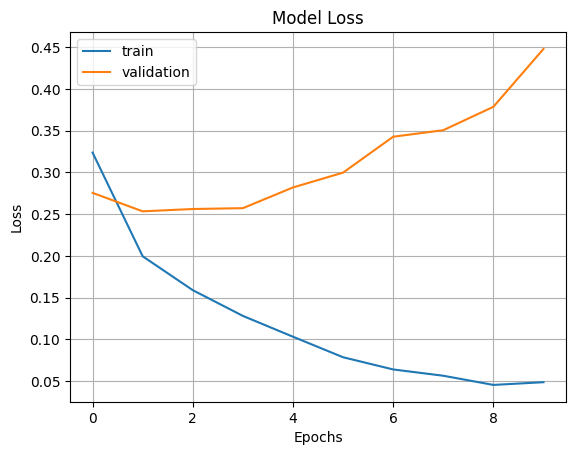

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [21]:
import cv2

In [22]:
def classify_image(model, image_path, class_names):
  image = cv2.imread(image_path)
  image_resized = cv2.resize(image, (img_height, img_width))
  image = np.expand_dims(image_resized, axis=0)
  pred = model.predict(image)
  output_class = class_names[np.argmax(pred)]
  return output_class


In [23]:
classify_image(resnet_model, "./seg_test/seg_test/buildings/20057.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'buildings'

In [24]:
classify_image(resnet_model, "./seg_test/seg_test/mountain/20085.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'mountain'

In [25]:
classify_image(resnet_model, "./seg_test/seg_test/sea/20072.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'sea'

In [26]:
classify_image(resnet_model, "./seg_test/seg_test/street/20075.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'street'

In [27]:
classify_image(resnet_model, "./seg_test/seg_test/forest/20108.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'forest'

In [28]:
classify_image(resnet_model, "./seg_test/seg_test/glacier/20179.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'glacier'